<h3 
    align="center" 
    style="font-size: 80px; padding:20px; font-family:Georgia; text-align:center; display:block; border-radius:10px;background-color:blue">
    <span style="color: white;"> UNEMPLOYMENT DATA ANALYSIS </span>
</h3>

<h3 
    align="center" 
    style="font-size: 35px; padding:20px; font-family:Georgia; text-align:center; display:block; border-radius:30px;background-color:orange">
    <span style="color: black;">Importing Libraries  </span>
</h3>

In [208]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import r2_score, mean_absolute_error

%matplotlib inline

# Loading Dataset 

In [209]:
data = pd.read_csv('Unemployment in India.csv')

In [210]:
# Changing column names for convenience

data['region'] = data['Region']
data['date'] = data[' Date']
data['frequency'] = data[' Frequency']
data['unemployment_rate'] = data[' Estimated Unemployment Rate (%)']
data['employed'] = data[' Estimated Employed']
data['labour_participation_rate'] = data[' Estimated Labour Participation Rate (%)']
data['area'] = data['Area']


data = data.drop(columns = ['Region',' Date', ' Frequency', ' Estimated Unemployment Rate (%)', ' Estimated Employed', ' Estimated Labour Participation Rate (%)', 'Area'], axis = 1)

<h3 
    align="center" 
    style="font-size: 35px; padding:20px; font-family:Georgia; text-align:center; display:block; border-radius:30px;background-color:orange">
    <span style="color: black;">🎯 Exploratory Data Analysis (EDA) 🎯 </span>
</h3>  

In [211]:
data.head()

,region,date,frequency,unemployment_rate,employed,labour_participation_rate,area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [238]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   region                     740 non-null    object 
 1   date                       740 non-null    object 
 2   frequency                  740 non-null    object 
 3   unemployment_rate          740 non-null    float64
 4   employed                   740 non-null    float64
 5   labour_participation_rate  740 non-null    float64
 6   area                       740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [83]:
data.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [84]:
data.describe(include = 'all')

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
count,740,740,740,740.000000,7.400000e+02,740.000000,740
unique,28,14,1,NaN,NaN,NaN,2
top,Andhra Pradesh,31-10-2019,Monthly,NaN,NaN,NaN,Urban
freq,28,55,740,NaN,NaN,NaN,381
mean,NaN,NaN,NaN,11.787946,7.204460e+06,42.630122,NaN
std,NaN,NaN,NaN,10.721298,8.087988e+06,8.111094,NaN
min,NaN,NaN,NaN,0.000000,4.942000e+04,13.330000,NaN
25%,NaN,NaN,NaN,4.657500,1.190404e+06,38.062500,NaN
50%,NaN,NaN,NaN,8.350000,4.744178e+06,41.160000,NaN
75%,NaN,NaN,NaN,15.887500,1.127549e+07,45.505000,NaN


In [216]:
# Most repeated region that present in the data
most_repeated_region = data['region'].value_counts()[[0]]

# Most frequent date 
frequent_date = data['date'].value_counts()[[0]]

# Number of unique states in region column
unique_regions = data['region'].nunique()

print('\nMost Repeated Region and Count : \n\n',most_repeated_region)
print('\nFrequent Date and count : ', frequent_date)
print('\nNumber of Unique Regions : ', unique_regions)


Most Repeated Region and Count : 

 Andhra Pradesh    28
Name: region, dtype: int64

Frequent Date and count :   31-10-2019    55
Name: date, dtype: int64

Number of Unique Regions :  28


In [219]:
# A State contains maximum number of employees
maximum_employed = data[['region', 'employed']].loc[data['employed'].idxmax()]

# A State contains minimum number of employees
minimum_employed = data[['region', 'employed']].loc[data['employed'].idxmin()]

print('Maximum Employed Region and Count of Employees : ', maximum_employed)
print('\nMinimum Employed Region and Count of Employees : ', minimum_employed)

Maximum Employed Region and Count of Employees :  region      Uttar Pradesh
employed       45777509.0
Name: 326, dtype: object

Minimum Employed Region and Count of Employees :  region      Puducherry
employed       49420.0
Name: 242, dtype: object


In [223]:
# maximum number of labour participation rate
maximum_labour_participated = data[['region', 'labour_participation_rate']].loc[data['labour_participation_rate'].idxmax()]

# minimum number of labour participation rate
minimum_labour_participated = data[['region', 'labour_participation_rate']].loc[data['labour_participation_rate'].idxmin()]

print('Maximum Labour Participated From a Region : ', maximum_labour_participated)
print('\nMinimum Labour Participated From a Region : ', minimum_labour_participated)

Maximum Labour Participated From a Region :  region                       Telangana
labour_participation_rate        72.57
Name: 294, dtype: object

Minimum Labour Participated From a Region :  region                       Kerala
labour_participation_rate     13.33
Name: 172, dtype: object


In [225]:
# maximum unemployment rate column  
maximum_unemplyment_rate = data[['region', 'unemployment_rate','area']].loc[data['unemployment_rate'].idxmax()]

#minimum unemployment rate column 
minimum_unemplyment_rate =data[['region', 'unemployment_rate','area']].loc[data['unemployment_rate'].idxmin()]

print('Maximum Unemployment Rate and Region : ', maximum_unemplyment_rate)
print('\nMinimum Unemployment Rate and Region : ', minimum_unemplyment_rate)

Maximum Unemployment Rate and Region :  region               Puducherry
unemployment_rate         76.74
area                      Urban
Name: 627, dtype: object

Minimum Unemployment Rate and Region :  region               Assam
unemployment_rate      0.0
area                 Rural
Name: 25, dtype: object


<h3 
    align="center" 
    style="font-size: 35px; padding:20px; font-family:Georgia; text-align:center; display:block; border-radius:30px;background-color:orange">
    <span style="color: black;">🎯 Data Visualization 🎯 </span>
</h3>  

In [112]:
data.head()

,region,date,frequency,unemployment_rate,employed,labour_participation_rate,area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


<AxesSubplot:>

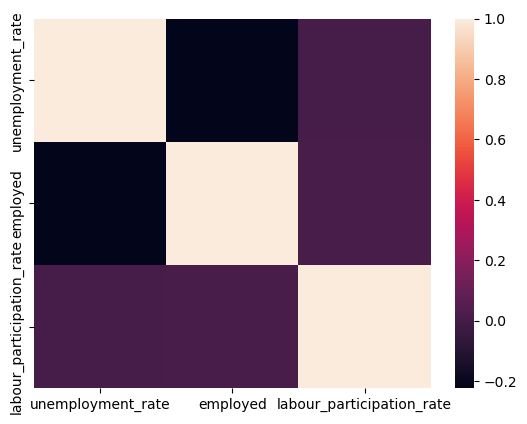

In [226]:
# Correlation analysis

corr_mat = data.corr()
sns.heatmap(corr_mat)

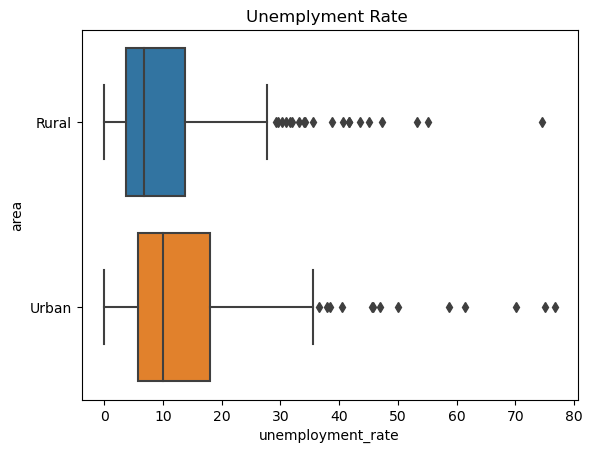

In [227]:
sns.boxplot(data= data, x = 'unemployment_rate', y = 'area')
plt.title('Unemplyment Rate ')
plt.show()

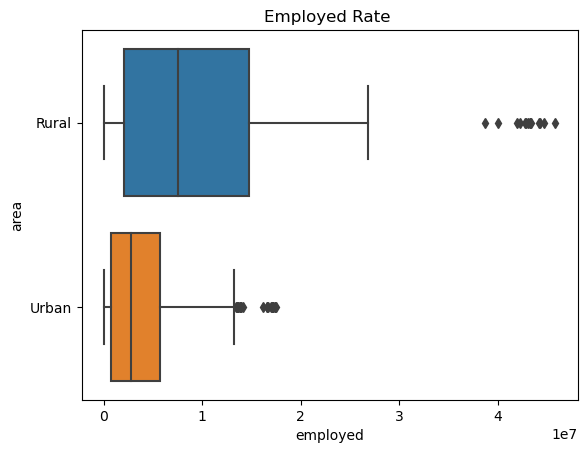

In [228]:
sns.boxplot(data= data, x = 'employed', y = 'area')
plt.title('Employed Rate ')
plt.show()

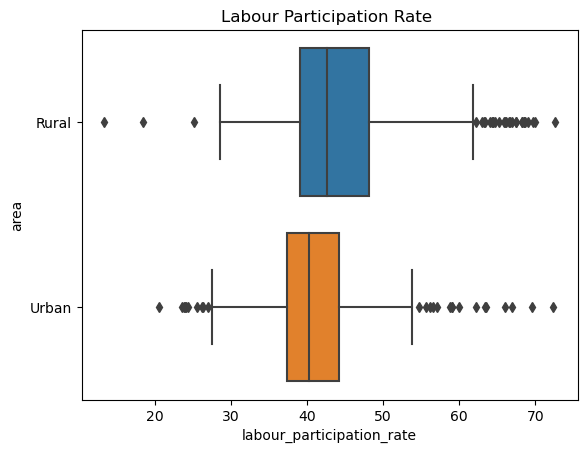

In [229]:
sns.boxplot(data= data, x = 'labour_participation_rate', y = 'area')
plt.title('Labour Participation Rate ')
plt.show()

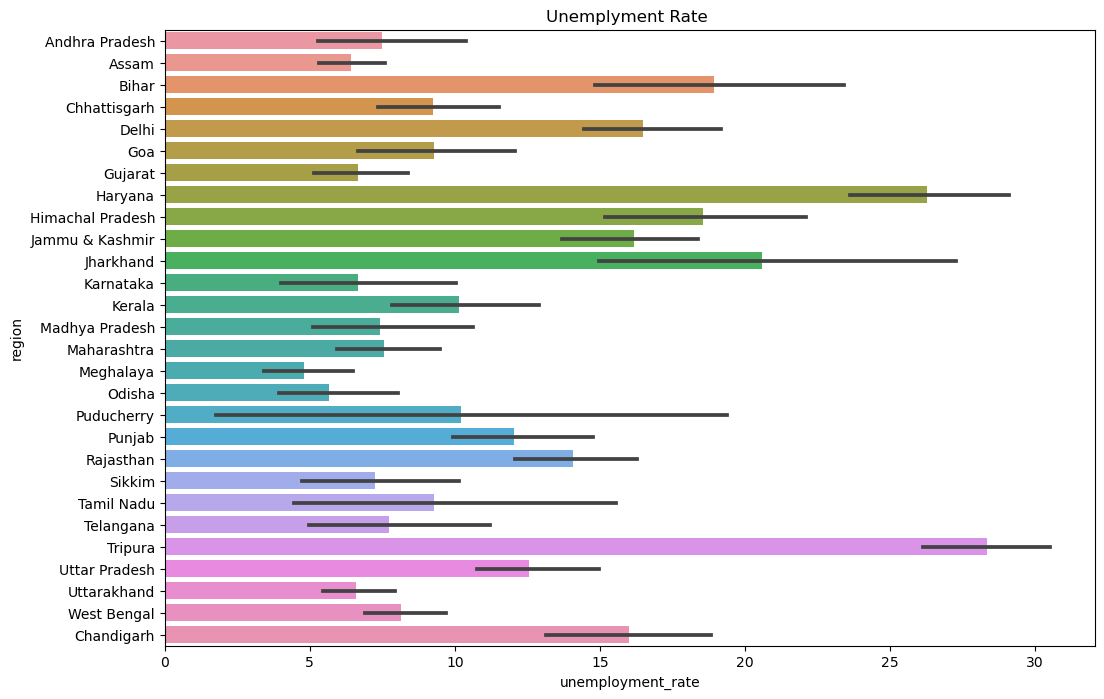

In [230]:
plt.figure(figsize = (12,8))
sns.barplot(y = data['region'], x = data['unemployment_rate'])
plt.title('Unemplyment Rate ')
plt.show()

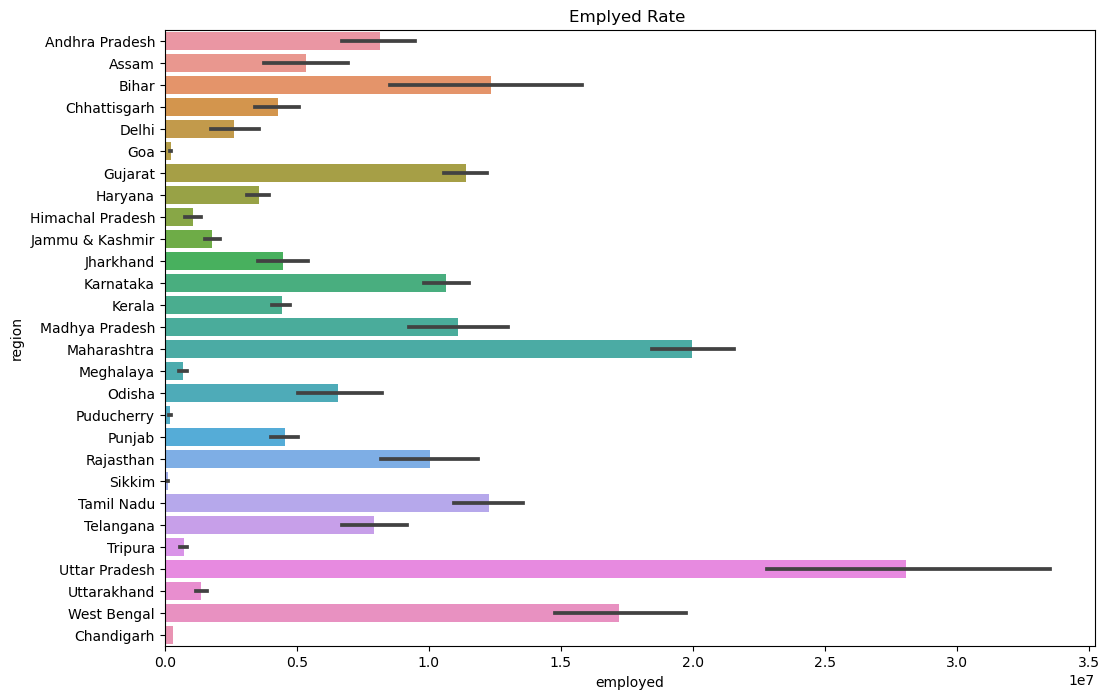

In [231]:
plt.figure(figsize = (12,8))
sns.barplot(y = data['region'], x = data['employed'])
plt.title('Emplyed Rate ')
plt.show()

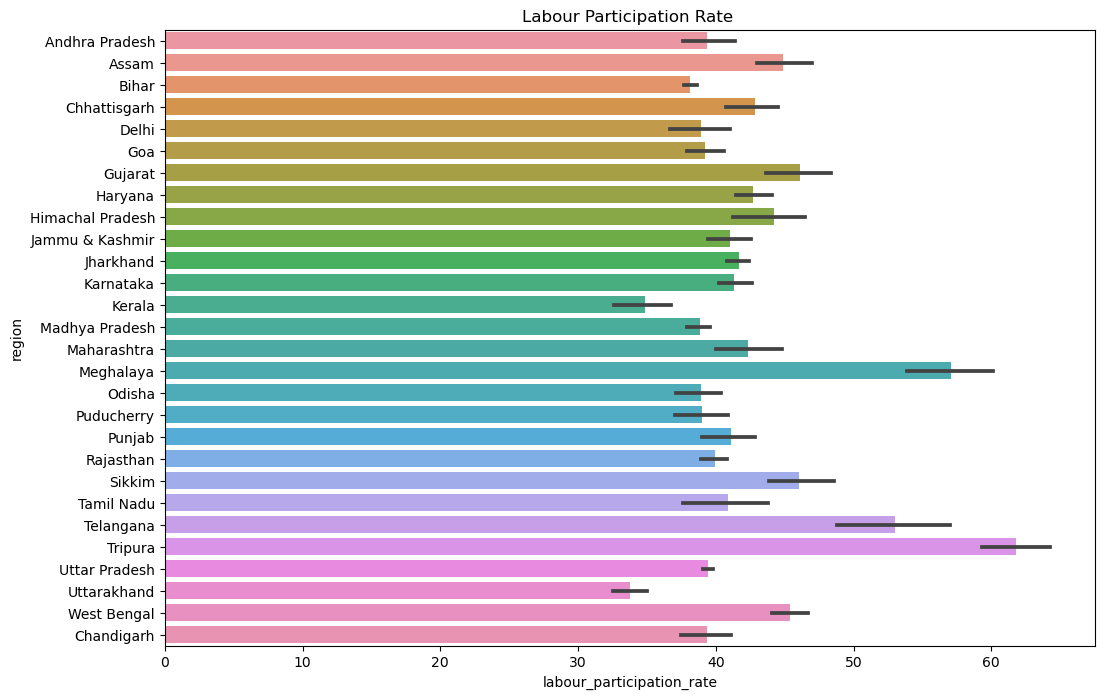

In [232]:
plt.figure(figsize = (12,8))
sns.barplot(y = data['region'], x = data['labour_participation_rate'])
plt.title('Labour Participation Rate ')
plt.show()

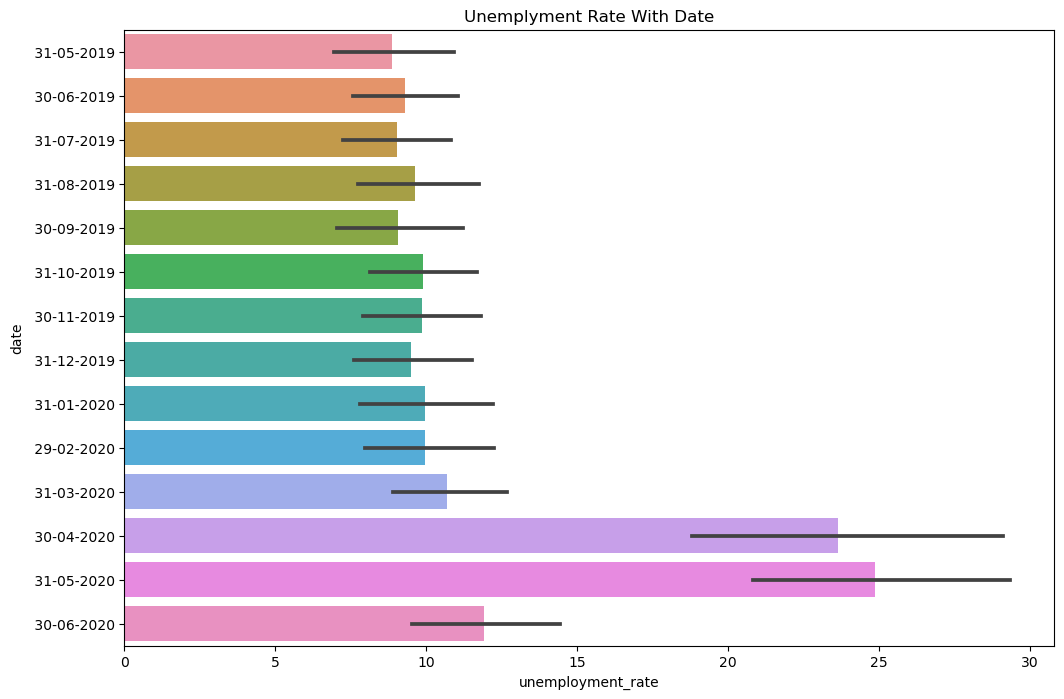

In [233]:
plt.figure(figsize = (12,8))
sns.barplot(y = data['date'], x = data['unemployment_rate'])
plt.title('Unemplyment Rate With Date')
plt.show()

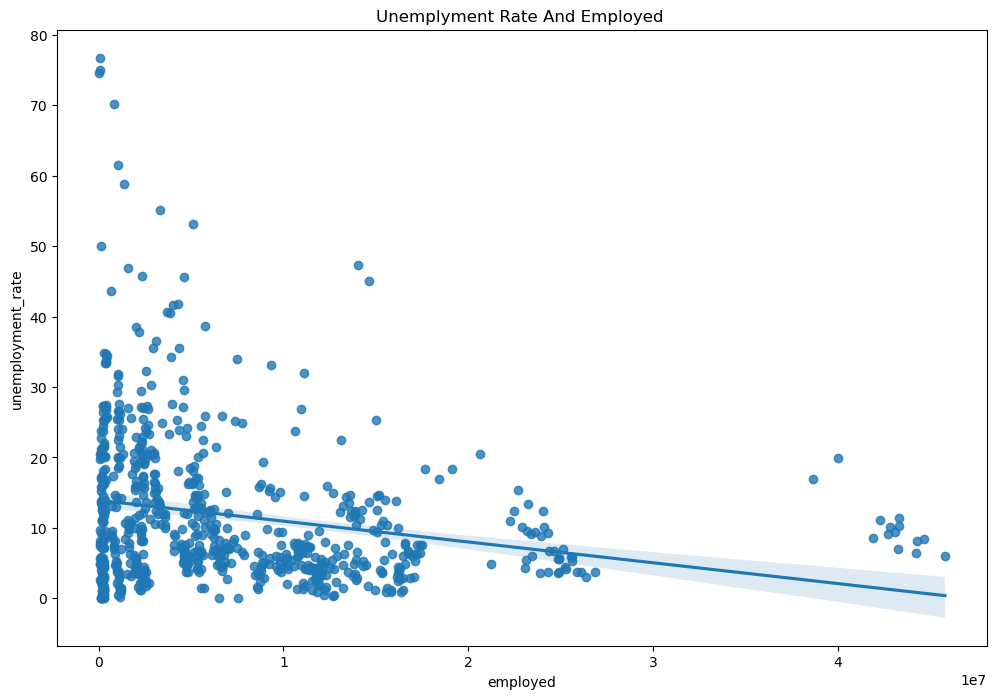

In [234]:
plt.figure(figsize = (12,8))
sns.regplot( x = data['employed'], y = data['unemployment_rate'])
plt.title('Unemplyment Rate And Employed ')
plt.show()

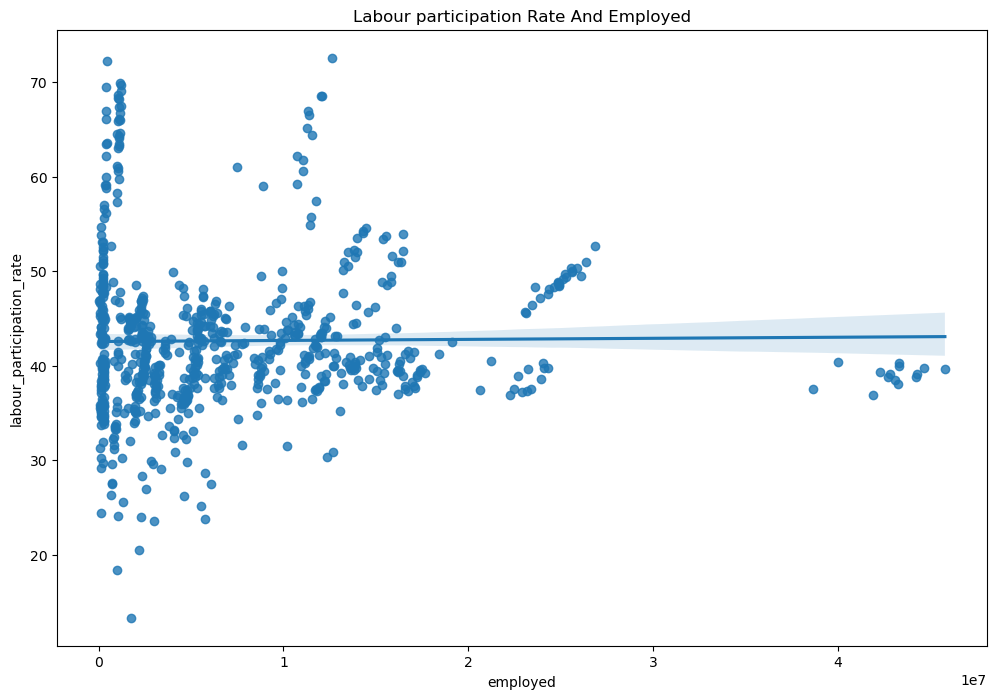

In [235]:
plt.figure(figsize = (12,8))
sns.regplot( x = data['employed'], y = data['labour_participation_rate'])
plt.title('Labour participation Rate And Employed')
plt.show()

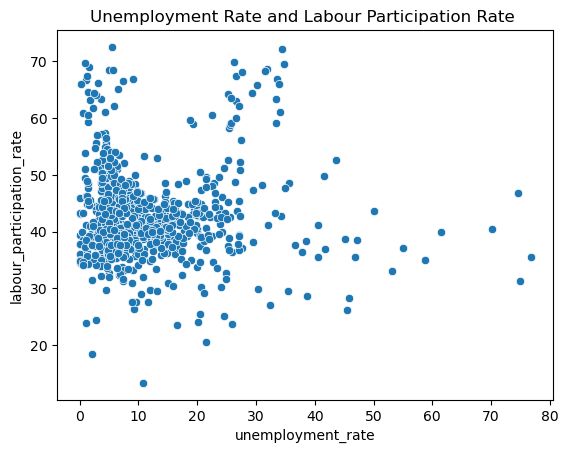

In [236]:
sns.scatterplot(data = data, x = 'unemployment_rate', y = 'labour_participation_rate')
plt.title('Unemployment Rate and Labour Participation Rate ')
plt.show()

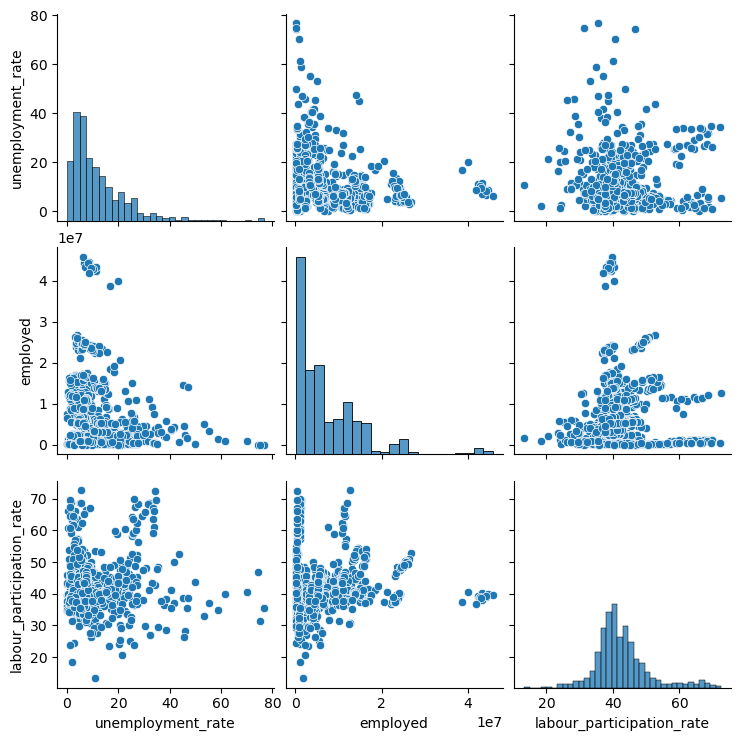

In [237]:
sns.pairplot(data)
plt.show()

<AxesSubplot:xlabel='employed', ylabel='labour_participation_rate'>

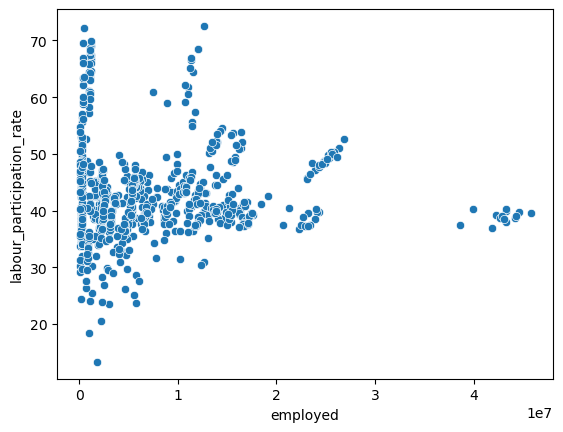

In [186]:
sns.scatterplot(data = data, x = 'employed', y = 'labour_participation_rate')

<h3 
    align="center" 
    style="font-size: 35px; padding:20px; font-family:Georgia; text-align:center; display:block; border-radius:30px;background-color:orange">
    <span style="color: black;">🎯 Data Preprocessing 🎯 </span>
</h3>  

In [144]:
data.dropna(inplace = True)

In [132]:
l_encoder = LabelEncoder()

data['region_encoded'] = l_encoder.fit_transform(data['region'])
data['date_encoded'] = l_encoder.fit_transform(data['date'])
data['area_encoded'] = l_encoder.fit_transform(data['area'])

# Feature Engineering 

In [126]:
data.drop(columns = 'frequency', axis = 1, inplace = True)

In [142]:
data.drop(columns = ['region', 'date', 'area'], axis = 1, inplace = True)

# Train Test Split 

In [166]:
x = data.drop(columns = ['unemployment_rate', 'labour_participation_rate'], axis = 1)
y = data['unemployment_rate']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 1)

<h3 
    align="center" 
    style="font-size: 35px; padding:20px; font-family:Georgia; text-align:center; display:block; border-radius:30px;background-color:orange">
    <span style="color: black;">🎯 Model 🎯 </span>
</h3>  

## Random Forest Regressor

In [176]:
rfr_model = RandomForestRegressor()
rfr_model.fit(x_train, y_train)

y_pred = rfr_model.predict(x_test)
print('R2 Score : ',r2_score(y_test, y_pred))
print('Mean Absolute Error : ',mean_absolute_error(y_test, y_pred))

R2 Score :  0.5504667197551278
Mean Absolute Error :  4.500867117117117


<h3 
    align="center" 
    style="font-size: 35px; padding:20px; font-family:Georgia; text-align:center; display:block; border-radius:30px;background-color:blue">
    <span style="color: black;">🎯 CONCLUSION 🎯 </span>
</h3>

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

- **Data Insights**: Through exploratory data analysis (EDA), I identified crucial patterns and insights, including the most repeated regions and key statistics related to unemployment, employment, and labor participation. This understanding forms the basis for any future analysis or policy recommendations.

- **Data Visualization**: Utilizing data visualization techniques, I visually represented the relationships between variables and regional disparities. This allowed for the identification of potential trends and disparities, helping to further understand the dataset's nuances.

- **Model Performance**: I applied a Random Forest Regressor model to predict unemployment rates, achieving valuable insights through evaluation metrics such as the R2 score and Mean Absolute Error. This modeling process provides a foundation for future predictive and analytical work.

In conclusion, this comprehensive analysis of unemployment data in India provides essential insights into regional employment trends. It showcases the significance of data analysis and modeling in addressing complex socioeconomic issues and establishes a valuable framework for potential policy recommendations to tackle unemployment challenges in the country.      
    </div>

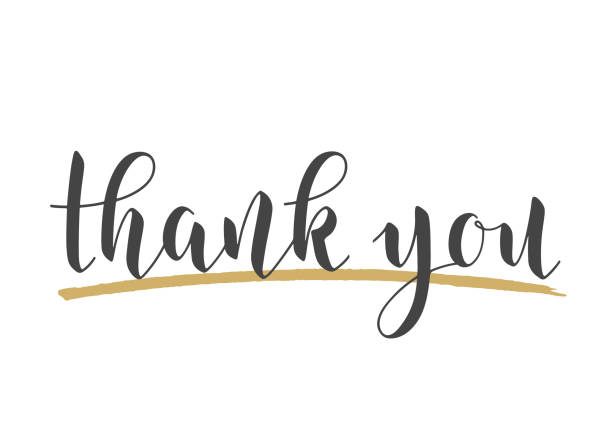